<a href="https://githubtocolab.com/Astolfo2332/HyM_prediction/blob/main/0.1_Analisis_De_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Análisis de datos predicción de compra H&M

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json' #Para proteger la información

In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f customers.csv
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv
! mkdir Data
! unzip transactions_train.csv.zip -d Data
! unzip customers.csv.zip -d Data
! unzip articles.csv.zip -d Data

## 1.0 Análisis inicial de las variables de interés   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

Primero procedemos a leer los datos

In [2]:
df=pd.read_csv("Data/articles.csv")
df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
df2=pd.read_csv("Data/customers.csv")
df2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
df3=pd.read_csv("Data/transactions_train.csv")
df3.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


En este caso como nos interesa saber el orden y la posibilidad de compras de los clientes no centraremos en las transacciones, para así tener una idea de cuales son los items o los compradores más frecuentes del data set

Podemos observar que la mayor compra de artículos es de un valor de 3

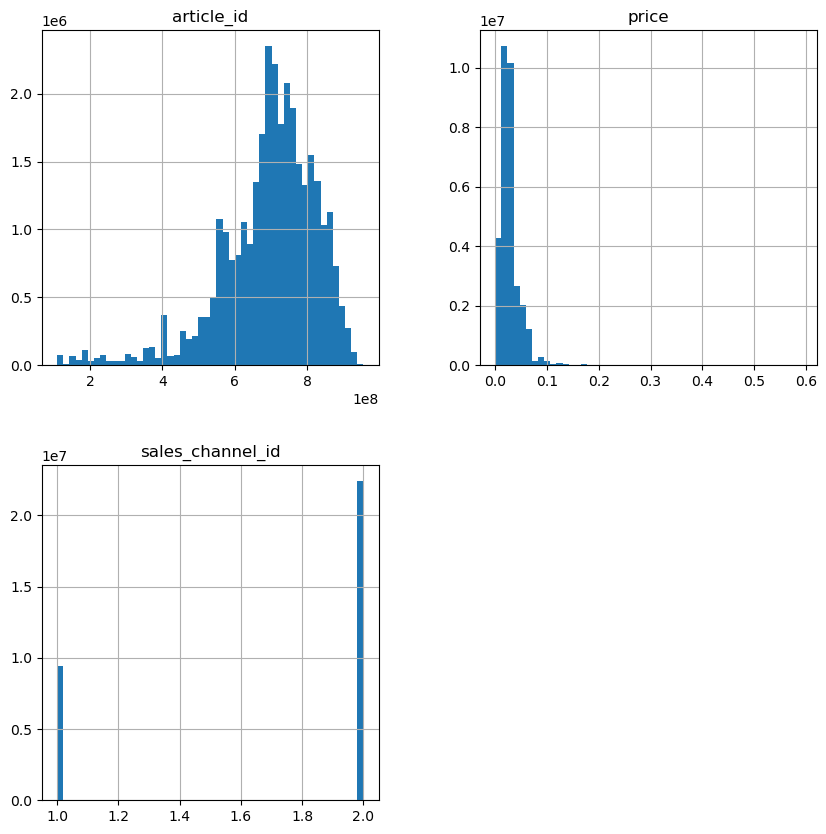

In [22]:
df3.hist(bins=50,figsize=(10,10))
plt.title("Histogramas de el historial de compras")


In [15]:
print('Skewness de la variable ', df3["article_id"].skew())

Skewness de la variable  -1.2593407027143166


La curva esta corrida a la derecha pero en este caso no importa mucho

In [13]:
df3.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


Para la idea de los mayores valores de interés ahora conocemos de cada columna la moda 

In [14]:
df3.mode()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,706016001,0.016932,2


## Datos faltantes

Vamos a observar si en el dataset existen datos faltantes, de lo contrario los crearemos

Para ventas

In [24]:
total           = df3.isnull().sum().sort_values(ascending=False)
percent         = (df3.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
t_dat,0.0,NaN
customer_id,0.0,0.0
article_id,0.0,NaN
price,0.0,NaN
sales_channel_id,0.0,NaN
Active,NaN,NaN
FN,NaN,NaN
age,NaN,NaN
club_member_status,NaN,NaN
fashion_news_frequency,NaN,NaN


Para clientes

In [25]:
total           = df2.isnull().sum().sort_values(ascending=False)
percent         = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


Para artículos

In [26]:
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df2.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing

,Total,Percent
detail_desc,416.0,NaN
perceived_colour_master_name,0.0,NaN
garment_group_name,0.0,NaN
garment_group_no,0.0,NaN
section_name,0.0,NaN
section_no,0.0,NaN
index_group_name,0.0,NaN
index_group_no,0.0,NaN
index_name,0.0,NaN
index_code,0.0,NaN
